In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import glob
import random
from scipy.stats import norm


Bad key "text.kerning_factor" on line 4 in
/home/rat0022/anaconda3/envs/new/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.3/matplotlibrc.template
or from the matplotlib source distribution


In [2]:
def set_size(width, fraction=1, subplots=(1, 1)):           #for science plots?
    """Set figure dimensions to avoid scaling in LaTeX.
    Source: https://jwalton.info/Embed-Publication-Matplotlib-Latex/

    Parameters
    ----------
    width: float or string
            Document width in points, or string of predined document type
    fraction: float, optional
            Fraction of the width which you wish the figure to occupy
    subplots: array-like, optional
            The number of rows and columns of subplots.
    Returns
    -------
    fig_dim: tuple
            Dimensions of figure in inches
    """
    if width == 'full':
        width_pt = 513.11743
    elif width == 'half':
        width_pt = 242.26653
    else:
        width_pt = width

    # Width of figure (in pts)
    fig_width_pt = width_pt * fraction
    # Convert from pt to inches
    inches_per_pt = 1 / 72.27

    # Golden ratio to set aesthetic figure height
    # https://disq.us/p/2940ij3
    golden_ratio = (5**.5 - 1) / 2

    # Figure width in inches
    fig_width_in = fig_width_pt * inches_per_pt
    # Figure height in inches
    fig_height_in = fig_width_in * golden_ratio * (subplots[0] / subplots[1])

    return (fig_width_in, fig_height_in)

In [3]:
data = pd.read_csv('/hyrule/data/users/kshitij/kg_121102/121102_paper/all_bursts_bary.csv')
tru = (data['use_fluence'] )    # use only the good ones marked as true
useful_data = data[tru] 
use =(useful_data['fit_method'] != 'curvefit')  # use only mcmc 
to_use = useful_data[use]
bandgood1=(to_use['$\mu_f$ (MHz)'] + 1.0*to_use['$\sigma_f$ (MHz)']) < 1780 # top of band 1780 MHz
band1 = to_use[bandgood1]
bandgood2 = (band1['$\mu_f$ (MHz)'] - 1.0*band1['$\sigma_f$ (MHz)']) > 980  # bottom of band 980 MHz
band2 = band1[bandgood2]
candids= np.array(band2['cand_id'])     #compare the cand id to the files in the directory which has distributions
path = '/hyrule/data/users/kshitij/kg_121102/121102_paper/fluence_times_bw/'
final_file=[]
for i in candids:
    file = path+i+'_fluence_times_bw.npy'
    final_file = np.append(final_file,file)
    #data = np.load(file)
print(final_file.shape)

(64,)


In [4]:
# all the multi-comp bursts

multi1 ='/hyrule/data/users/kshitij/kg_121102/121102_paper/fluence_times_bw/cand_tstart_57644.407719907409_tcand_248.2970000_dm_562.05600_snr_97.12390_fluence_times_bw.npy'
multi2 = '/hyrule/data/users/kshitij/kg_121102/121102_paper/fluence_times_bw/cand_tstart_57644.407719907409_tcand_4886.4000000_dm_565.30000_snr_15.69560_fluence_times_bw.npy'
multi3 = '/hyrule/data/users/kshitij/kg_121102/121102_paper/fluence_times_bw/cand_tstart_57645.409861111111_tcand_159.4330000_dm_558.83100_snr_7.95436_fluence_times_bw.npy'
multi4 = '/hyrule/data/users/kshitij/kg_121102/121102_paper/fluence_times_bw/cand_tstart_57645.409861111111_tcand_1460.2500000_dm_555.62500_snr_12.63900_fluence_times_bw.npy'
multi5='/hyrule/data/users/kshitij/kg_121102/121102_paper/fluence_times_bw/cand_tstart_57645.409861111111_tcand_1743.9100000_dm_558.83100_snr_13.70630_fluence_times_bw.npy'
multi6 = '/hyrule/data/users/kshitij/kg_121102/121102_paper/fluence_times_bw/cand_tstart_57645.409861111111_tcand_4286.4700000_dm_562.05600_snr_168.68900_fluence_times_bw.npy'
multi_burst_names = list([multi1,multi2,multi3,multi4,multi5,multi6])
#multi = list([multi1,multi5,multi6])

In [5]:
# deleting all the multi-comp bursts from the final_file list. 


test1 = np.delete(final_file, np.where(final_file==multi1))
test2 = np.delete(test1, np.where(test1==multi2))
test3 = np.delete(test2, np.where(test2==multi3))
test4 = np.delete(test3, np.where(test3==multi4))
test5 = np.delete(test4, np.where(test4==multi5))
only_single_comp = np.delete(test5, np.where(test5==multi6))

In [7]:
def Energy(x):    # function to compute energies
    return x*4*np.pi*((972*3.086e24)**2)*10**(-23)*10**(3)   # 10**(3) to convert MHz.ms to Hz.s

In [9]:
# let's find the single-component energies

single = np.array([list(np.load(i)) for i in only_single_comp]) # loading only single comp files
en_sin = Energy(single) #Energy distribution of all single comp bursts

/home/rat0022/anaconda3/envs/new/lib/python3.6/site-packages/ipykernel_launcher.py:3: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  This is separate from the ipykernel package so we can avoid doing imports until


In [10]:
#multi component energies. We are only using the components and bursts that was totally inside the band

mul = []
mu = [list(np.load(i)) for i in multi_burst_names]
en1 = Energy(mu[0][0])+Energy(mu[0][1])   # summing both components of 97 sig
en4 = Energy(mu[3][0])                    #using only one comp of this
en5 = Energy(mu[4][0])+Energy(mu[4][1])     #using both comp
en6 = Energy(mu[5][0])+Energy(mu[5][1])+Energy(mu[5][2])   #summing all three comp of 168 sig  
en_mul =np.append(mul,[en1,en5,en6,en4])
print(en_mul.shape)

(4,)


/home/rat0022/anaconda3/envs/new/lib/python3.6/site-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


In [11]:
# appending single and multiple to an array

en_tot = np.append(en_sin,en_mul)
en_tot.shape

(60,)

In [12]:
def randomized_energies(x):   # define a function that will randomly select points from each bursts and compute energies of those
    randomized = []
    for i in x:
        rand = random.choice(i)
        randomized = np.append(randomized,rand)
    return randomized

In [13]:
def rate(x):
    N_tot = []                      #computing number of bursts above energy E
    for i in x:
        rx = x >= i
    #print(rx)
        res = [j for j, val in enumerate(rx) if val]  
        Rx = len(res)
        N_tot  = np.append(N_tot,Rx)
    return N_tot

In [14]:
def double_power(E,E_break,alpha,beta,E_scale):      #function to define a double-power law
    fit =[]
    for energy in E:
        if energy < E_break:
            N = E_scale*((energy/E_break)**alpha)
        else:
            N = E_scale*((energy/E_break)**beta)
        fit.append(N)
    return np.array(fit)

In [16]:
#compute the values of the broken-power law function parameters

alphas =[]    
betas = []
E_break = []
E_scale =[]
energies = [randomized_energies(en_tot) for i in range(1000)] #find random energies from all the single bursts 1000 times
for i in energies:
    complete = i[np.where(i>5.81e+36)] # above completeness threshold for the fitting
    u = complete*10**(-37)             # for fitting
    popt, pcov = curve_fit(double_power, u, rate(u), bounds=((1,-5,-5,-np.inf),
                                                                 (3,0,0,np.inf)), 
                           maxfev=15000) # a double power law fit
    alphas = np.append(alphas,popt[1])
    betas = np.append(betas,popt[2])
    E_break = np.append(E_break,popt[0])
    E_scale = np.append(E_scale,popt[3])

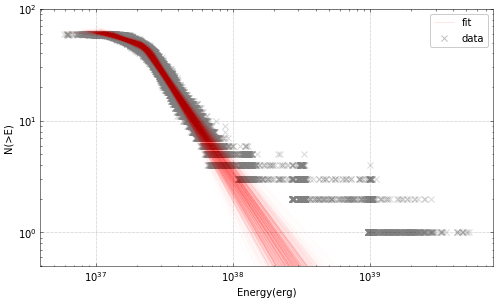

In [24]:
# let's plot with the best-fit values computed from previous step

with plt.style.context(['science', 'grid', 'no-latex']):
    plt.figure(figsize=set_size(width='full')) # for half page width figures use full for full page width figures

    for i, energy in enumerate(energies):
        complete = energy[np.where(energy>5.81e+36)] # above completeness threshold for the fitting
        u = complete*10**(-37)             # for fitting

        alpha = alphas[i]
        beta = betas[i]
        E_th = E_break[i]
        amp = E_scale[i]
        popt = []

        plt.plot(np.sort(u*10**(37)),double_power(np.sort(u), E_th, alpha, beta, amp),linewidth=0.05, color='red',alpha=0.2)

        plt.yscale('log')    #plots are in log scale
        plt.xscale('log')
        plt.scatter(u*10**37, rate(u), color='grey',alpha=0.3, marker='x')
    plt.scatter(u*10**37, rate(u), color='grey',alpha=0.5,label='data',marker='x')
    plt.plot(np.sort(u*10**(37)),double_power(np.sort(u), E_th, alpha, beta, amp),linewidth=0.5,color='red',alpha=0.2,label='fit')


    plt.xlabel('Energy(erg)')
    plt.ylabel('N(>E)')
    plt.legend(loc = 'upper right')
    plt.ylim([0.5, 100])
    plt.tight_layout()
    plt.savefig('cumulative_energies.pdf', bbox_inches='tight')
    plt.show()

In [23]:
np.median(alphas), np.median(betas), np.median(E_break), np.median(E_scale)

(-0.413945304849767,
 -1.8476845472897268,
 2.2976641123287953,
 46.27183617495467)